In [171]:
# Import some modules that we will require
import numpy as np  
import scipy as sp
import sklearn # This is a module of machine learning tools

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Text(0, 0.5, 'hydrostatic_stress')

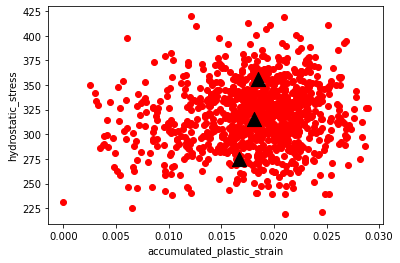

In [174]:
# Import some modules that we will require
import numpy as np  
import scipy as sp
import sklearn # This is a module of machine learning tools



import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import MiniBatchKMeans






data = np.loadtxt('euler_ep_sigh.txt', delimiter=' ')
data_for_analysis=data[:,3:]
# fit on the whole data
kmeans = MiniBatchKMeans(n_clusters=3).fit(data_for_analysis)
#print('cluster:\n{}'.format(kmeans.labels_))




    


plt.scatter(data[:,3],data[:,4],marker='o', color='r') # plot the data
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^', color='k', s=200)





easy=np.zeros(3)
moderate=np.zeros(3)
hard=np.zeros(3)

for n in range(np.size(data,0)):
    if kmeans.labels_[n]==0:
        easy=np.vstack((easy, data[n,:3]) )
    elif kmeans.labels_[n]==1:
        moderate=np.vstack((moderate, data[n,:3]) )
    else:
        hard=np.vstack((hard, data[n,:3]) )
#print('easy:\n{}' .format(easy))
#print('moderate:\n{}' .format(moderate))
#print('hard:\n{}' .format(hard))
plt.xlabel('accumulated_plastic_strain')
plt.ylabel('hydrostatic_stress')

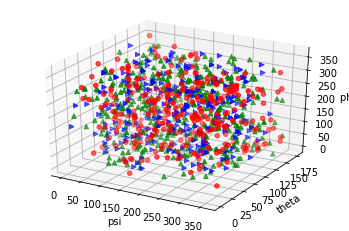

In [170]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



ax.scatter(easy[1:,0],easy[1:,1],easy[1:,2], c='r', marker='o')
ax.scatter(moderate[1:,0],moderate[1:,1],moderate[1:,2], c='b', marker='>')
ax.scatter(hard[1:,0],hard[1:,1],hard[1:,2], c='g', marker='^')

ax.set_xlabel('psi')
ax.set_ylabel('theta')
ax.set_zlabel('phi ')

plt.show()